## Rubric

Instructions: DELETE this cell before you submit via a `git push` to your repo before deadline. This cell is for your reference only and is not needed in your report. 

 Scoring: Out of 10 points

- Each Developing  => -2 pts
- Each Unsatisfactory/Missing => -4 pts
  - until the score is 0

If students address the detailed feedback in a future checkpoint they will earn these points back






|                                  | **Unsatisfactory**                                                                                                                                                                                                                                                                                                                        | **Developing**                                                                                                                                                                                                       | **Proficient**                                                                                                                                                                                            | **Excellent**                                                                                                                                                                            |
|----------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **EDA relevance**                | EDA is mostly neither relevant to the question nor helpful in figuring out how to address the question. Or the EDA does address the question, but many obviously relevant variables / analyses / figures were not included. | EDA is partly irrelevant/unhelpful. EDA missed one or two obvioulsy relevant analysis (distributions of single variables or relationships between variables) | EDA includes the obviously relevant / helpful variables in addressing the question.                                                              | Thorough EDA fully explored the dataset                                                                                                                 |
| **EDA analysis and description** | Many of the analyses are poor choices (e.g., using means instead of medians for obviously skewed data), or are poorly described in the text, or do not aid understanding the data                                                                                                                                                     | Some of the analyses are poor choices, or are poorly described in the text, or do not aid understanding the data                                                                                                 | All analyses are correct choices. Only one or two have minor issues in the text descriptions supporting them. Mostly they fit well with other elements of the EDA and support understanding the data  | All analyses are correct choices with clear text descriptions supporting them. The figures fit well with the other elements of the EDA, producing a clear understanding of the data. |
| **EDA figures**                  | Many of the figures are poor plot choices (e.g., using a bar plot to represent a time series where it would be better to use a line plot) or have poor aesthetics (including colormap, data point shape/color, axis labels, titles, annotations, text legibility) or do not aid understanding the data                                | Some of the figures are poor plot choices or have poor aesthetics. Some figures do not aid understanding the data                                                                                                | All figures are correct plot choices. Only one or two have minor questionable aesthetic choices. The figures mostly fit well with the other elements of the EDA and support understanding the data    | All figures are correct plot choices with beautiful aesthetics. The figures fit well with the other elements of the EDA, producing a clear understanding of the data.                |





# COGS 108 - EDA Checkpoint

## Authors

Instructions: REPLACE the contents of this cell with your team list and their contributions. Note that this will change over the course of the checkpoints

This is a modified [CRediT taxonomy of contributions](https://credit.niso.org). For each group member please list how they contributed to this project using these terms:
> Analysis, Background research, Conceptualization, Data curation, Experimental investigation, Methodology, Project administration, Software, Visualization, Writing - original draft, Writing - review & editing

Example team list and credits:
- Alice Anderson: Conceptualization, Data curation, Methodology, Writing - original draft
- Bob Barker:  Analysis, Software, Visualization
- Charlie Chang: Project administration, Software, Writing - review & editing
- Dani Delgado: Analysis, Background research, Visualization, Writing - original draft

# Research Question

Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your proposal feedback



## Background and Prior Work

Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your proposal feedback

# Hypothesis


Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your proposal feedback

## Data

### Data overview

Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your data checkpoint feedback


In [12]:
# Run this code every time when you're actively developing modules in .py files.  It's not needed if you aren't making modules
#
## this code is necessary for making sure that any modules we load are updated here 
## when their source code .py files are modified

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
# Setup code -- Run only once after cloning!!! 
#
# this code downloads the data from its source to the `data/00-raw/` directory
# if the data hasn't updated you don't need to do this again!

# if you don't already have these packages (you should!) uncomment this line
# %pip install requests tqdm

import sys
sys.path.append('./modules') # this tells python where to look for modules to import

import get_data # this is where we get the function we need to download data

# replace the urls and filenames in this list with your actual datafiles
# yes you can use Google drive share links or whatever
# format is a list of dictionaries; 
# each dict has keys of 
#   'url' where the resource is located
#   'filename' for the local filename where it will be stored 
datafiles = [
    { 'url': 'https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/airline-safety/airline-safety.csv', 'filename':'airline-safety.csv'},
    { 'url': 'https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/bad-drivers/bad-drivers.csv', 'filename':'bad-drivers.csv'}
]

get_data.get_raw(datafiles,destination_directory='data/00-raw/')

Overall Download Progress:  50%|█████     | 1/2 [00:00<00:00,  5.79it/s]

Successfully downloaded: airline-safety.csv


Overall Download Progress: 100%|██████████| 2/2 [00:00<00:00,  5.93it/s]

Successfully downloaded: bad-drivers.csv


### Dataset #1 

Instructions: REPLACE the contents of this cell and the one below with your work, including any updates to recover points lost in your data checkpoint feedback

In [14]:
## YOUR CODE TO LOAD/CLEAN/TIDY/WRANGLE THE DATA GOES HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION 

### Dataset #2
 as above, add any more copies of this that you need to given how many datasets you have

In [15]:
## YOUR CODE TO LOAD/CLEAN/TIDY/WRANGLE THE DATA GOES HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION 

## Results

### Exploratory Data Analysis

Instructions: replace the words in this subsection with whatever words you need to setup and preview the EDA you're going to do.   

Please explicitly load the fully wrangled data you will use from `data/02-processed`.  This is a good idea rather than forcing people to re-run the data getting / wrangling cells above.  Sometimes it takes a long time to get / wrangle data compared to reloading the fixed up dataset.

Carry out whatever EDA you need to for your project in the code cells below.  Because every project will be different we can't really give you much of a template at this point. But please make sure you describe the what and why in text here as well as providing interpretation of results and context.

Please note that you should consider the use of python modules in your work.  Any code which gets called repeatedly should be modularized. So if you run the same pre-processing, analysis or visualiazation on different subsets of the data, then you should turn that into a function or class.  Put that function or class in a .py file that lives in `modules/`.  Import the module you made and use it to get your work done.  For reference see `get_raw()` which is inside `modules/get_data.py`. 



#### Section 1 of EDA - Play mode distributions/Number of games in top 250s

**Goal:** To visualize the play mode distribution over number of games in top 250s, and show the increase/decrease trend of the number of games in the top 250 per period. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns


def parse_tags(tag_str):
    """Strip a stringified list into a Python list of tag strings."""
    if pd.isna(tag_str):
        return []
    return [t.strip().strip("'\"") for t in tag_str.strip("[]").split(",")]


def load_tags(years=range(2018, 2024)):
    """Load appid/tags/year from all yearly top-250 CSVs; parse tags into lists."""
    frames = pd.concat(
        [pd.read_csv(f"data/02-processed/{yr}_top250_final.csv")
             .assign(year=yr)[["appid", "tags", "year"]]
         for yr in years],
        ignore_index=True,
    )
    frames["tags"] = frames["tags"].apply(parse_tags)
    return frames


def explode_mode(df_tags, mode_tags=("singleplayer", "multiplayer", "co-op")):
    """Explode tag lists to one row per mode; keep only the three target modes.
    A single game can appear in multiple mode rows simultaneously."""
    exploded = df_tags.explode("tags").rename(columns={"tags": "mode"})
    return exploded[exploded["mode"].isin(mode_tags)].reset_index(drop=True)


def assign_period(year):
    """Map a year to its COVID-era period label."""
    if year <= 2019:
        return "Pre-COVID (2018-2019)"
    elif year <= 2021:
        return "COVID (2020-2021)"
    else:
        return "Post-COVID (2022-2023)"


In [ ]:
MODE_COLORS  = {"singleplayer": "#4878cf", "multiplayer": "#e8601c", "co-op": "#6baed6"}
PERIOD_ORDER = ["Pre-COVID (2018-2019)", "COVID (2020-2021)", "Post-COVID (2022-2023)"]

df_peak              = pd.read_csv("data/02-processed/steamcharts_2018_2023_ok.csv")
df_peak["month_dt"]  = pd.to_datetime(df_peak["month"])

df_mode           = explode_mode(load_tags())
df_mode["period"] = df_mode["year"].apply(assign_period)

# Inner join: keeps only games that have both steamcharts data and a recognised mode tag
df = df_peak.merge(df_mode[["appid", "year", "mode"]], on=["appid", "year"], how="inner")

print("df_mode shape:", df_mode.shape)
print(df_mode["mode"].value_counts())
print("df shape:", df.shape)


df_mode shape: (2124, 4)
mode
singleplayer    1443
multiplayer      406
co-op            275
Name: count, dtype: int64
df shape: (14005, 10)


#### Visualization 1 — Play Mode Distribution Per Period

Distinct top-250 games are counted per play mode (non-exclusive: a game may appear under multiple modes) and grouped into three COVID-era periods. Bars are annotated with each mode's count as a % of unique games in that period.


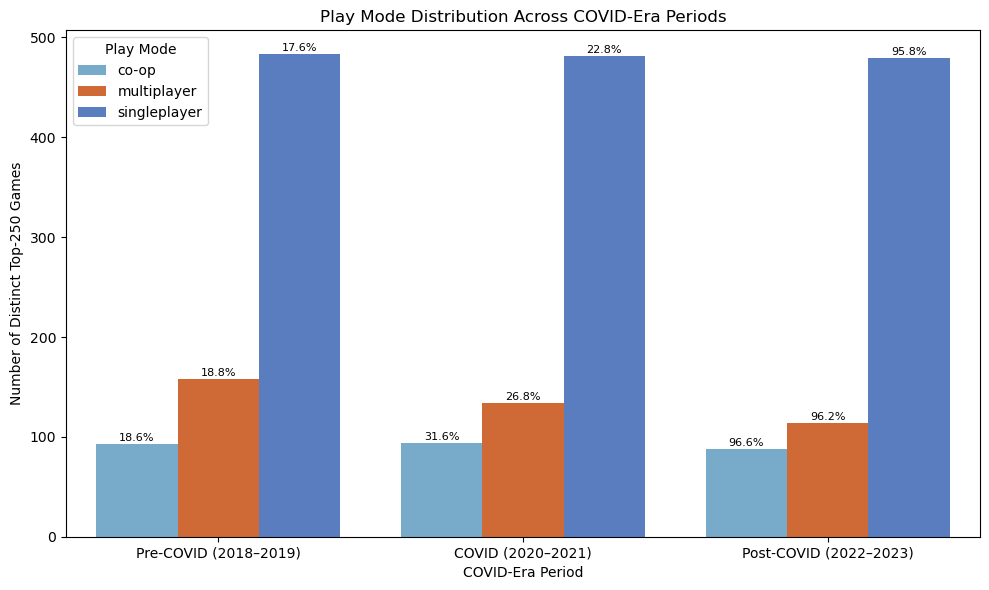

In [18]:
# Count distinct games per period × mode
period_counts = (
    df_mode.groupby(["period", "mode"])["appid"]
    .nunique()
    .reset_index(name="count")
)
period_counts["period"] = pd.Categorical(
    period_counts["period"], categories=PERIOD_ORDER, ordered=True
)
period_counts = period_counts.sort_values("period")

# % relative to unique games in that period (denominator = total unique appids per period)
period_total  = df_mode.groupby("period")["appid"].nunique().rename("total")
period_counts = period_counts.join(period_total, on="period")
period_counts["pct"] = period_counts["count"] / period_counts["total"] * 100

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=period_counts, x="period", y="count", hue="mode",
            palette=MODE_COLORS, order=PERIOD_ORDER, ax=ax)

for patch, (_, row) in zip(ax.patches, period_counts.iterrows()):
    if row["pct"] >= 3:
        ax.text(patch.get_x() + patch.get_width() / 2,
                patch.get_height() + 1,
                f"{row['pct']:.1f}%",
                ha="center", va="bottom", fontsize=8)

ax.set_xlabel("COVID-Era Period")
ax.set_ylabel("Number of Distinct Top-250 Games")
ax.set_title("Play Mode Distribution Across COVID-Era Periods")
ax.legend(title="Play Mode")
plt.tight_layout()
plt.show()


#### Visualization 2 — Top 250 Active Games Per Month by Play Mode (2018-2023)

Each line tracks the number of distinct top-250 games with a given play mode that appear in SteamCharts for that month. Major x-ticks show year labels; minor ticks show individual months. The last data point of each line is annotated with its % share of that month's total.


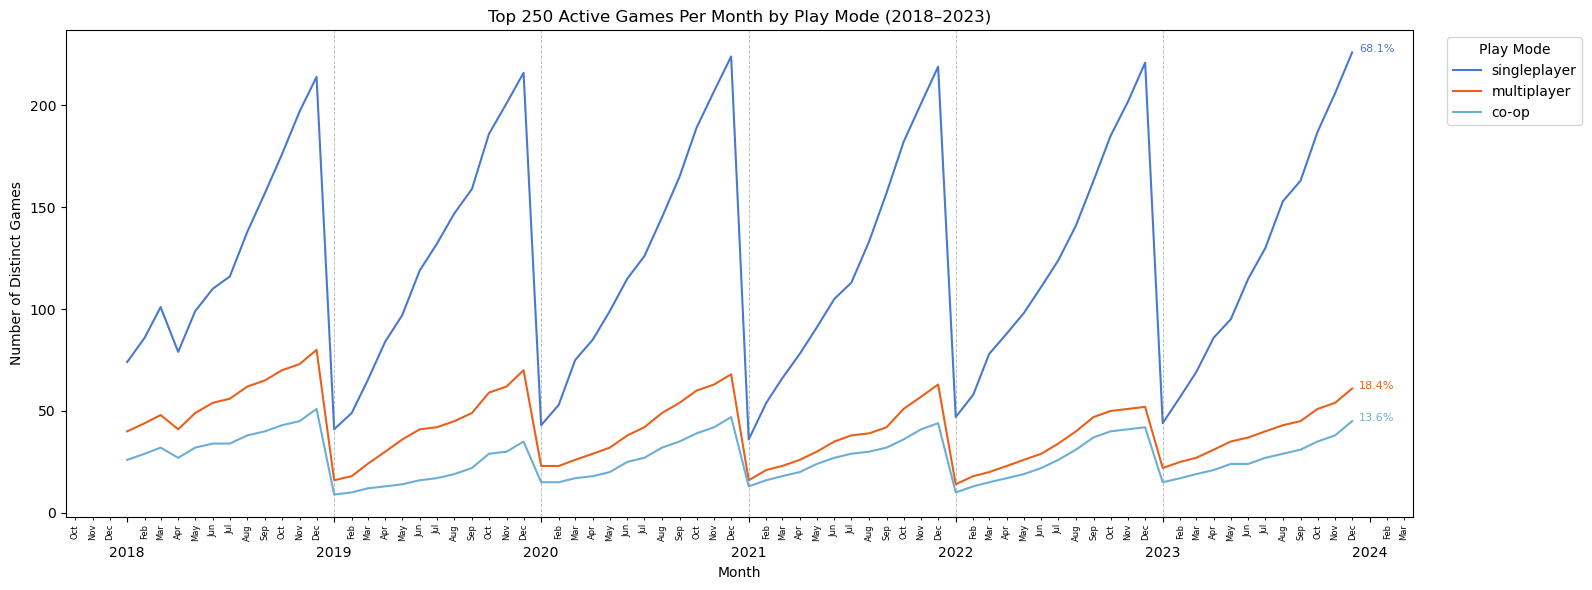

In [ ]:
monthly_counts = (
    df.groupby(["month_dt", "mode"])["appid"]
    .nunique()
    .unstack(fill_value=0)
    .sort_index()
)

fig, ax = plt.subplots(figsize=(16, 6))

for mode, color in MODE_COLORS.items():
    if mode in monthly_counts.columns:
        ax.plot(monthly_counts.index, monthly_counts[mode],
                label=mode, linewidth=1.5, color=color)

for yr in range(2019, 2024):
    ax.axvline(pd.Timestamp(f"{yr}-01-01"), color="gray",
               linestyle="--", linewidth=0.7, alpha=0.5)

# Major ticks = years, minor ticks = months
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%b"))
ax.tick_params(axis="x", which="major", labelsize=10, pad=18)
ax.tick_params(axis="x", which="minor", labelsize=6, rotation=90)

last_total = monthly_counts.iloc[-1].sum()
for mode, color in MODE_COLORS.items():
    if mode in monthly_counts.columns:
        last_val = monthly_counts[mode].iloc[-1]
        pct = last_val / last_total * 100 if last_total > 0 else 0
        ax.annotate(f"{pct:.1f}%",
                    xy=(monthly_counts.index[-1], last_val),
                    xytext=(5, 0), textcoords="offset points",
                    fontsize=8, color=color)

ax.set_xlabel("Month")
ax.set_ylabel("Number of Distinct Games")
ax.set_title("Top 250 Active Games Per Month by Play Mode (2018-2023)")
ax.legend(title="Play Mode", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


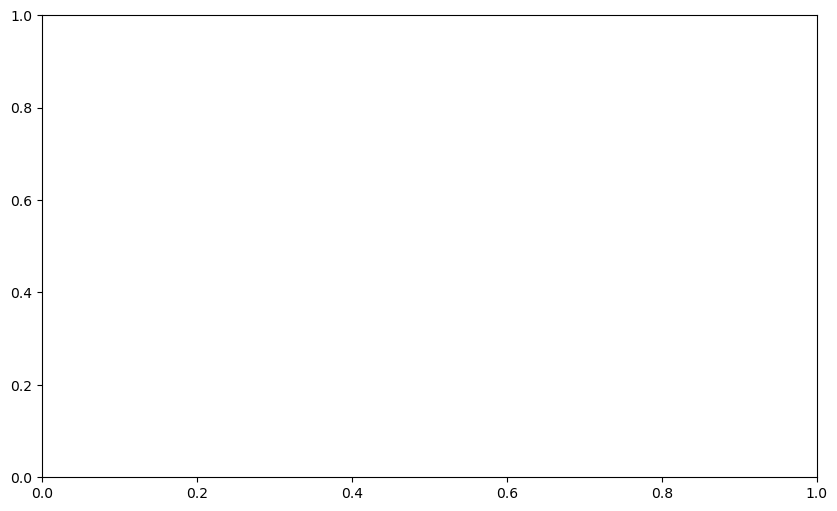

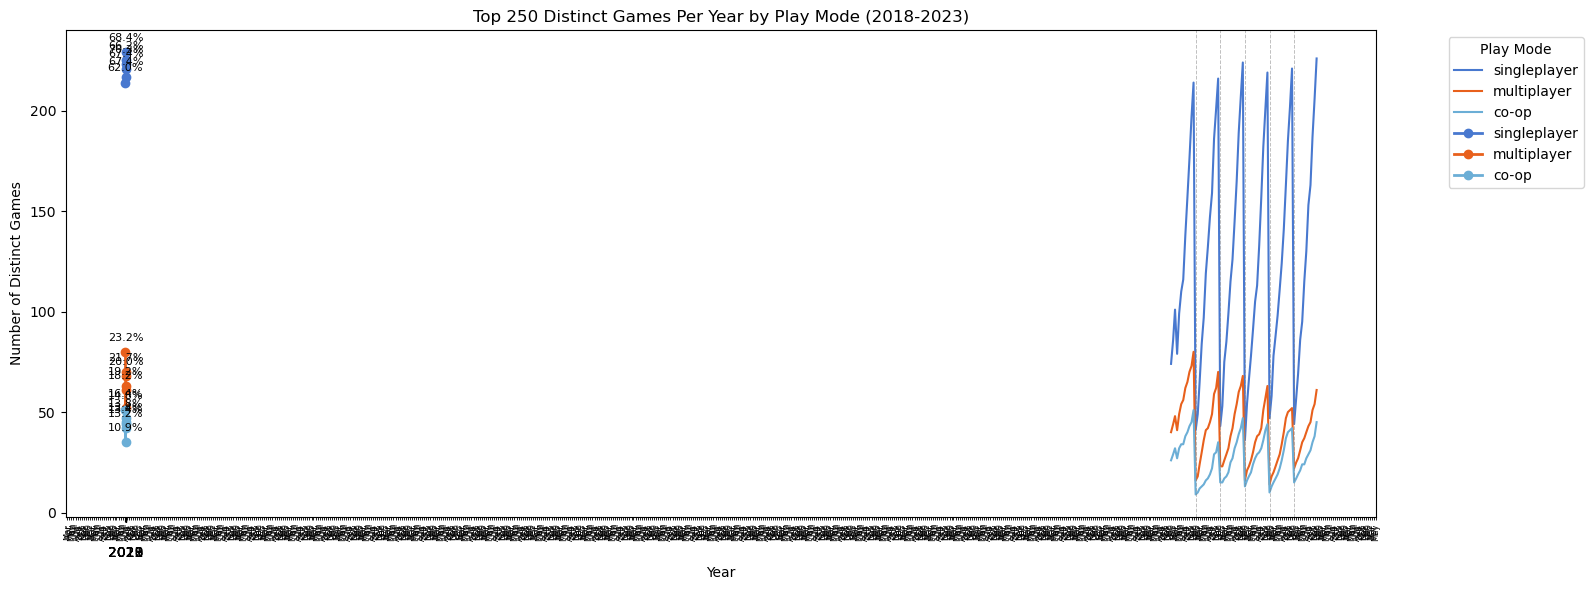

In [ ]:
yearly_counts = (
    df.groupby(["year", "mode"])["appid"]
    .nunique()
    .unstack(fill_value=0)
    .sort_index()
)
total_per_year = yearly_counts.sum(axis=1)

fig, ax = plt.subplots(figsize=(10, 6))

for mode, color in MODE_COLORS.items():
    if mode in yearly_counts.columns:
        ax.plot(yearly_counts.index, yearly_counts[mode],
                marker="o", label=mode, linewidth=2, color=color)
        for yr in yearly_counts.index:
            val = yearly_counts.loc[yr, mode]
            pct = val / total_per_year[yr] * 100 if total_per_year[yr] > 0 else 0
            if pct >= 3:
                ax.annotate(f"{pct:.1f}%",
                            xy=(yr, val), xytext=(0, 8),
                            textcoords="offset points",
                            ha="center", fontsize=8)

ax.set_xticks(yearly_counts.index)
ax.set_xticklabels(yearly_counts.index, rotation=0)
ax.set_xlabel("Year")
ax.set_ylabel("Number of Distinct Games")
ax.set_title("Top 250 Distinct Games Per Year by Play Mode (2018-2023)")
ax.legend(title="Play Mode", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


#### Visualization 3 — Top 250 Distinct Games Per Year by Play Mode (2018-2023)

Yearly de-noised view of Visualization 2. Each data point shows how many distinct top-250 games carried each play mode tag in that year, with percentage annotations relative to that year's total.


#### Observations

> *To be filled in after reviewing the charts above.*
>
> Consider addressing:
> - Which play mode has the most games in the top 250, and whether that is surprising.
> - Whether the balance between singleplayer, multiplayer, and co-op games shifted across COVID-era periods.
> - Any notable within-year seasonality or anomalies visible in the monthly chart.


#### Section 2 of EDA if you need it  - please give it a better title than this

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [ ]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

#### Section 3 of EDA
Blah blah blah.

In [ ]:
# Insert some code here. Hello world!

## Ethics

Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your proposal feedback

## Team Expectations 

Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your proposal feedback

## Project Timeline Proposal

Instructions: Replace this with your timeline.  **PLEASE UPDATE your Timeline!** No battle plan survives contact with the enemy, so make sure we understand how your plans have changed.  Also if you have lost points on the previous checkpoint fix them